# Stage 1: Importing dependencies for the project

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

C:\Users\Ad\Anaconda3\envs\newenvt\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'2.1.0'

# Stage 2: Dataset preprocessing

Loading the Cifar10 dataset

In [2]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Image normalization

In [5]:
X_train = X_train / 255.0

In [7]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_test.shape

(10000, 1)

In [12]:
X_test = X_test / 255.0

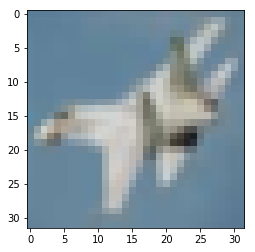

In [13]:
plt.imshow(X_test[10])

# Stage 3: Building a Convolutional neural network

Defining the model

In [14]:
model = tf.keras.models.Sequential()

In [15]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [16]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [17]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [18]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [19]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [20]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

Adding the Flatten layer

In [21]:
model.add(tf.keras.layers.Flatten())

Adding the first Dense layer

In [22]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [34]:
model.add(tf.keras.layers.Dropout(0.2))

Adding the second Dense layer (output layer)

In [35]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# Stage 4:Compiling the model

In [37]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam", metrics=["sparse_categorical_accuracy"])


# Stage 5:Training the model

In [38]:
model.fit(X_train, y_train, epochs=15)

Train on 50000 samples
Epoch 1/15
50000/50000 [==============================] - 601s 12ms/sample - loss: 2.0464 - sparse_categorical_accuracy: 0.2399
Epoch 2/15
50000/50000 [==============================] - 515s 10ms/sample - loss: 1.7766 - sparse_categorical_accuracy: 0.3327
Epoch 3/15
50000/50000 [==============================] - 511s 10ms/sample - loss: 1.6462 - sparse_categorical_accuracy: 0.3505
Epoch 4/15
50000/50000 [==============================] - 512s 10ms/sample - loss: 1.5713 - sparse_categorical_accuracy: 0.3717
Epoch 5/15
50000/50000 [==============================] - 524s 10ms/sample - loss: 1.5210 - sparse_categorical_accuracy: 0.4137
Epoch 6/15
50000/50000 [==============================] - 526s 11ms/sample - loss: 1.4543 - sparse_categorical_accuracy: 0.4470
Epoch 7/15
50000/50000 [==============================] - 505s 10ms/sample - loss: 1.4011 - sparse_categorical_accuracy: 0.4605
Epoch 8/15
50000/50000 [==============================] - 502s 10ms/sample - loss

# Stage 6 :Model evaluation and prediction

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 53s 5ms/sample - loss: 1.0784 - sparse_categorical_accuracy: 0.7411


In [39]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.741100013256073
